In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [28]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 
prev_year = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()

# Save the query results into a data frame
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=True)
print(df.to_string(index=False))

# Sort the dataframe by date
print(df.to_string(index=False))

# Use Pandas Plotting with Matplotlib to plot the data

df.plot

       date  precipitation
 2016-08-23           0.00
 2016-08-24           0.08
 2016-08-25           0.08
 2016-08-26           0.00
 2016-08-27           0.00
 2016-08-28           0.01
 2016-08-29           0.00
 2016-08-30           0.00
 2016-08-31           0.13
 2016-09-01           0.00
 2016-09-02           0.00
 2016-09-03           0.00
 2016-09-04           0.03
 2016-09-05            NaN
 2016-09-06            NaN
 2016-09-07           0.05
 2016-09-08           0.00
 2016-09-09           0.03
 2016-09-10           0.00
 2016-09-11           0.05
 2016-09-12           0.00
 2016-09-13           0.02
 2016-09-14           1.32
 2016-09-15           0.42
 2016-09-16           0.06
 2016-09-17           0.05
 2016-09-18           0.00
 2016-09-19           0.00
 2016-09-20           0.00
 2016-09-21           0.00
 2016-09-22           0.02
 2016-09-23           0.00
 2016-09-24           0.00
 2016-09-25           0.00
 2016-09-26           0.06
 2016-09-27           0.02
 

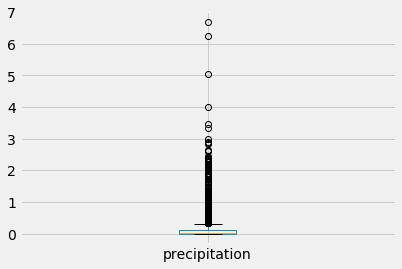

In [29]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()
df.boxplot()

In [12]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [13]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

[(77.0,), (77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), 

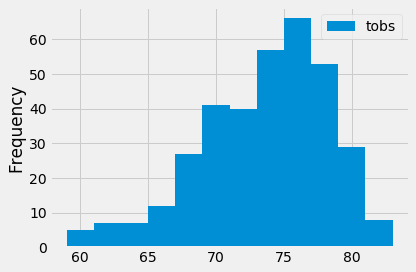

In [15]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
print(results)
df = pd.DataFrame(results, columns=['tobs'])
print(df)
df.plot.hist(bins=12)
plt.tight_layout()

In [16]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates

def calc_temps(start=None, end=None):
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]           
    if not end: 
        results = session.query(*sel).\
        filter(Measurement.date <= start).all()
        temps = list(np.ravel(results))
        return jsonify(temps)

        results = session.query(*sel).\
        filter(Measurement.date >= start).\
        filter(Measurement.date <= end).all()
        temps = list(np.ravel(results))
        return jsonify(temps)

        start = dt.date(2017, 6, 1)
        end = dt.date(2017, 6, 30)
    return(calc_temps)


# Challenge

In [17]:
# Air temperature for June

from sqlalchemy import extract  

june_tobs = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(extract('month', Measurement.date)==6).all()
june_tobs

[(64.0, 85.0, 74.94411764705882)]

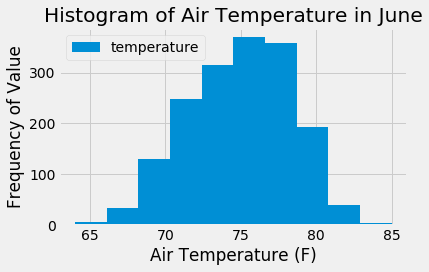

In [50]:
# June air temp dataframe
june_tobs = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==6).all()
june_tobs
june_df = pd.DataFrame(june_tobs, columns=['date', 'temperature'])
june_df
june_df.plot.hist(bins=10)
plt.ylabel('Frequency of Value')
plt.xlabel('Air Temperature (F)')
plt.title(r'Histogram of Air Temperature in June')
plt.tight_layout()

In [19]:
june_df.describe()

,temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [32]:
# December air temp
dec_tobs = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(extract('month', Measurement.date)==12).all()
dec_tobs

[(56.0, 83.0, 71.04152933421226)]

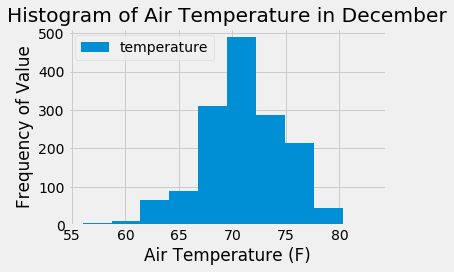

In [51]:
# Dec air temp dataframe and histogram
dec_tobs = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==12).all()
dec_df = pd.DataFrame(dec_tobs, columns=['date', 'temperature'])
dec_df
dec_df.plot.hist(bins=10)
plt.ylabel('Frequency of Value')
plt.xlabel('Air Temperature (F)')
plt.title(r'Histogram of Air Temperature in December')
plt.tight_layout()

In [52]:
# Dec Air temp stats
dec_df.describe()

,temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [34]:
# Precip for June
june_precip = session.query(func.min(Measurement.prcp), func.max(Measurement.prcp), func.avg(Measurement.prcp)).\
filter(extract('month', Measurement.date)==6).all()
june_precip

[(0.0, 4.43, 0.13635959339263018)]

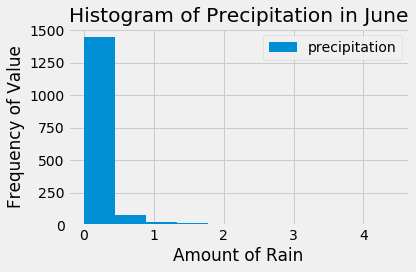

In [47]:
# June air temp dataframe
june_precip = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date)==6).all()
june_precip
june_df2 = pd.DataFrame(june_precip, columns=['date', 'precipitation'])
june_df2

june_df2.plot.hist(bins=10)
plt.ylabel('Frequency of Value')
plt.xlabel('Amount of Rain')
plt.title(r'Histogram of Precipitation in June')
plt.tight_layout()

In [43]:
june_df2.describe()

,precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [ ]:

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=1)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_ylabel('Frequency of Value')
ax.set_xlabel('Amount of Rain')
ax.set_title(r'Histogram of Precipitation')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

In [41]:
dec_precip = session.query(func.min(Measurement.prcp), func.max(Measurement.prcp), func.avg(Measurement.prcp)).\
filter(extract('month', Measurement.date)==12).all()
dec_precip


[(0.0, 6.42, 0.21681850533807792)]

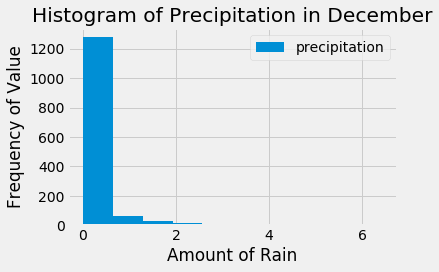

In [49]:
# dec air temp dataframe
dec_precip = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date)==12).all()
dec_precip
dec_df2 = pd.DataFrame(dec_precip, columns=['date', 'precipitation'])
dec_df2
dec_df2.plot.hist(bins=10)
plt.ylabel('Frequency of Value')
plt.xlabel('Amount of Rain')
plt.title(r'Histogram of Precipitation in December')
plt.tight_layout()